In [40]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import ScalarFormatter 

In [41]:
class BodyWeight():
    """Model do obliczania zmiany masy ciała w czasie.
    Args:
        t (int): Czas trwania symulacji. [dni]
        m (float): Początkowa masa ciała [kg].
        h (int): Wzrost [cm].
        a (int): Wiek [lat].
        c (int): Dzienna liczba spożywanych kalorii [kcal].
        f (float): Poziom aktywności fizycznej.
        sex (str): Płeć - 'k' dla kobiety, 'm' dla mężczyzny.
    """
    def __init__(self, t, m, h, a, c, f, sex):
        self.t = t
        self.m = m
        self.h = h
        self.a = a
        self.c = c
        self.f = f
        if sex == "k":
            self.s = -161
        elif sex == "m":
            self.s = 5
        self.result_euler = []
        self.result_runge_kutta = []
        self.result_analytical = []
        self.time_euler = []
        self.time_runge_kutta = []
        self.time_analytical = []

    def BMR(self):
        """ Oblicz podstawową przemianę materii (BMR). """
        P = 10 * self.m + 6.25 * self.h - 5 * self.a + self.s
        return P

    def dm_dt(self, m):
        dm = (self.c - self.f * (10 * m + 6.25 * self.h - 5 * self.a + self.s)) / 7700
        return dm
    
    def final_weight_euler(self, h = 0.001):
        """ Oblicz zmianę masy ciała po upływie czasu t - metoda Eulera. """
        n = int(self.t / h)  # liczba kroków
        t = 0
        m = self.m
        for i in range(n):
            m = m + self.dm_dt(m) * h
            t = t + h
            self.time_euler.append(t)
            self.result_euler.append(m)
        return m
    
    def final_weight_runge_kutta(self, h = 0.001):
        """ Oblicz zmianę masy ciała po upływie czasu t - metoda Runge-Kutta. """
        n = int(self.t / h)  # liczba kroków
        t = 0
        m = self.m
        for i in range(n):
            k1 = h * self.dm_dt(m)
            k2 = h * self.dm_dt(m + 0.5 * k1)
            k3 = h * self.dm_dt(m + 0.5 * k2)
            k4 = h * self.dm_dt(m + k3)
            m = m + (1.0 / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
            t = t + h
            self.time_runge_kutta.append(t)
            self.result_runge_kutta.append(m)
        return m
    
    def final_weight_analytical(self, h = 0.001):
            """Calculate the change in body weight for a given time step 'h'."""
            for t in range(1, int(self.t / h) + 1):
                m = (self.m - (self.c - self.f * (6.25 * self.h - 5 * self.a + self.s)) / (10 * self.f)) * math.exp(-self.f * t * h / 770) + (self.c - self.f * (6.25 * self.h - 5 * self.a + self.s)) / (10 * self.f)
                self.result_analytical.append(m)
                self.time_analytical.append(t * h)
            return m
        
    # wykres na podstawie rozwiązania analitycznego
    def all_weights(self):
        plt.figure(figsize=(8, 6)) 
        plt.plot(self.time_analytical, self.result_analytical) 
        plt.xlabel('Czas [dni]')
        plt.ylabel('Masa ciała [kg]')
        plt.title(f'Zmiana masy ciała')
        plt.grid()
        plt.show()
        
    def calculate_error(self):
        """ Oblicz błąd pomiędzy rozwiązaniem analitycznym, a numerycznym"""
        errors_euler = []
        errors_runge_kutta = []
        time_steps = [0.1, 0.01, 0.001, 0.0001]  # Przykładowe kroki czasowe
        for h in time_steps:
            self.result_analytical = []
            self.result_euler = []
            self.result_runge_kutta = []
            self.final_weight_analytical(h)
            self.final_weight_euler(h)
            self.final_weight_runge_kutta(h)
            
            euler = []
            for i in range(len(self.result_analytical)):   #liczymy bład (różnice) między wszystkimi elementami listy danego kroku czasowego
                error = np.abs(self.result_analytical[i] - self.result_euler[i])
                euler.append(error)
            errors_euler.append(max(euler))   #wybieramy największy błąd z danego kroku czasowego i dodajemy do listy errors
            runge_kutta = []
            for i in range(len(self.result_analytical)): 
                error = np.abs(self.result_analytical[i] - self.result_runge_kutta[i])
                runge_kutta.append(error)
            errors_runge_kutta.append(max(runge_kutta))

        plt.figure(figsize=(8, 6))
        plt.loglog(time_steps, errors_euler, marker='o', label='Euler Method')
        plt.loglog(time_steps, errors_runge_kutta, marker='o', label='Runge-Kutta Method')
        plt.xlabel('Krok czasowy')
        plt.ylabel('Błąd')
        plt.title('Błąd między rozwiązaniami numerycznymi a analitycznymi')
        plt.legend()
        plt.grid()
        plt.show()

60.55682422940102
60.55683610147214
60.55683610146999


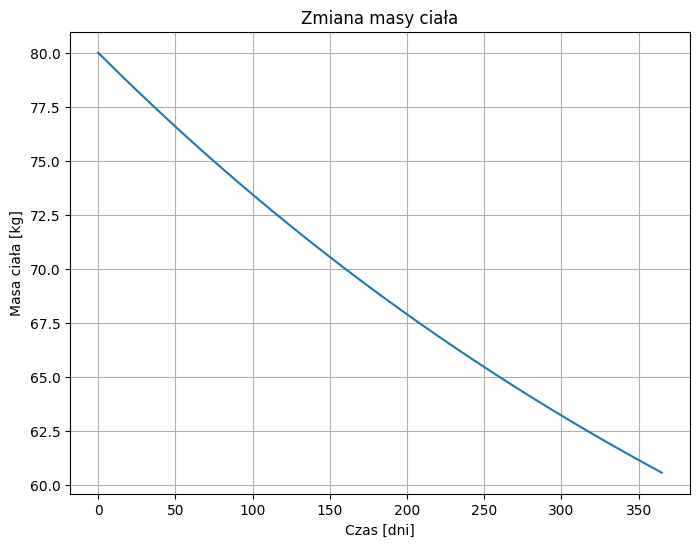

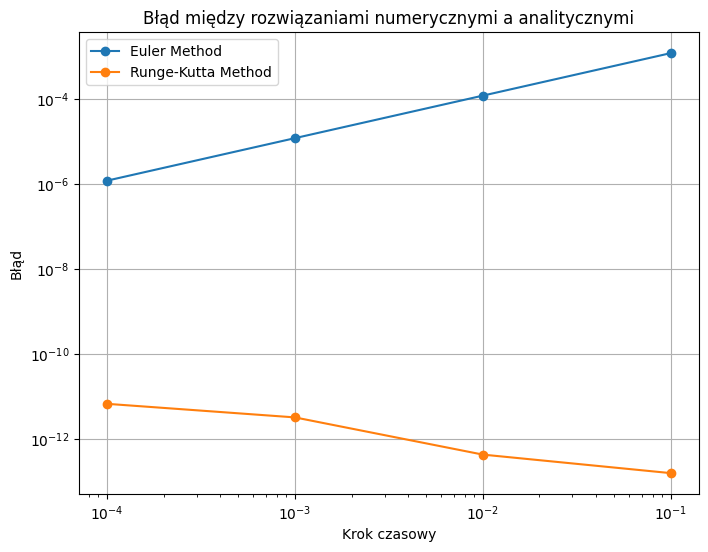

In [42]:
Ania = BodyWeight(t=365, m=80, h=170, a=25, c=1500, f=1.3, sex="k")
print(Ania.final_weight_euler())
print(Ania.final_weight_runge_kutta())
print(Ania.final_weight_analytical())
Ania.all_weights()
Ania.calculate_error()